# scikit-learn
機械学習のためのさまざまなアルゴリズムを収録したライブラリ。<br>
アルゴリズムには「回帰（リグレッション）」「クラスター化」などある。<br>
https://scikit-learn.org/stable/

## 基本的な使い方

In [3]:
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
import matplotlib.pyplot as plt
import pandas as pd

# scikit-learnに収録されている糖尿病患者のデータを読み込む
diabetes = sklearn.datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [4]:
# 1年後の病状の進行を数値化したもの
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## 交差検証（Cross-validation：クロスバリデーション）
**NOTE:** 慣習として機械学習アルゴリズムに入力するデータは `X` という変数に、機械学習の出力結果と比較するデータは `y` という変数に格納する。
<hr>

### ホールドアウト法
モデルを作る訓練用のデータと、モデルを評価するテスト用のデータに分けること。

In [11]:
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2  # テスト用に20%、訓練用に80%のデータを使う
)
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)  # 機械学習を実行
lr.score(X_test, y_test)  # 機械学習の結果が実際の数字にどれだけ近いか評価

0.5138121415652213

### 機械学習の結果をグラフ化

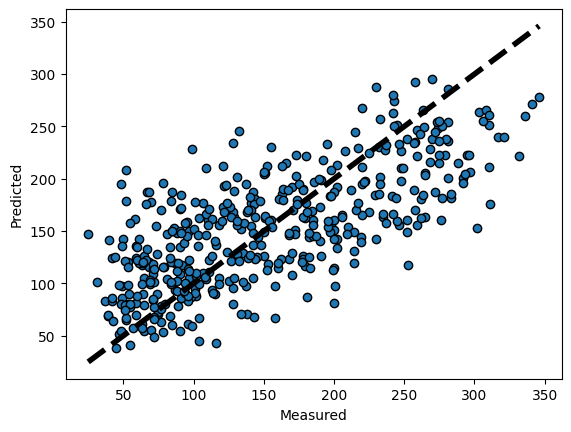

In [12]:
perdicted = lr.predict(X)  # 機械学習による予測を取得
fig, ax = plt.subplots()
ax.scatter(y, perdicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()